In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
data = pd.read_csv("Netflix Shows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


Удалите из данных дупликаты. 

In [ ]:
df = data.drop_duplicates()
df

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
# пронумеруем индексы по порядку
df.reset_index(inplace=True)
df

,index,title,rating,ratingLevel,release year,user rating score
0,0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...,...
495,989,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
# удалим старые индексы
del df['index']
df

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [ ]:
# Проверка уникальных значений в title
df.title.nunique()

496

In [ ]:
df[df.title.duplicated(keep=False)].sort_values('title')

,title,rating,ratingLevel,release year,user rating score
128,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
257,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
321,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
366,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
119,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
135,Skins,TV-MA,NaN,2017,NaN
269,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
276,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


Вывод: Названия фильмов одинаковые, но параметры разные. Либо совпадение, либо ремейки.

In [ ]:
# Добавим столбец - длина заголовка
df['title_len'] = df.title.apply(len)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/600719666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_len'] = df.title.apply(len)


,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
0,White Chicks,PG-13,"crude and sexual humor, language and drug content",2004,82.0,12,2
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,19,3
2,Grey's Anatomy,TV-14,parents strongly cautioned. may be unsuitable ...,2016,98.0,14,2
3,Prison Break,TV-14,parents strongly cautioned. may be unsuitable ...,2008,98.0,12,2
4,How I Met Your Mother,TV-PG,parental guidance suggested. may be unsuitable...,2014,94.0,21,5
...,...,...,...,...,...,...,...
495,Russell Madness,PG,rude humor and sports action,2015,NaN,15,2
496,Wiener Dog Internationals,G,general audiences. suitable for all ages,2015,NaN,25,3
497,Pup Star,G,general audiences. suitable for all ages,2016,NaN,8,2
498,Precious Puppies,TV-G,suitable for all ages,2003,NaN,16,2


In [ ]:
# Добавим столбец - количество слов в заголовке
df['words_in_title'] = df.title.apply(lambda s: s.count(' ') + 1)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/993893461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_in_title'] = df.title.apply(lambda s: s.count(' ') + 1)


,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
0,White Chicks,PG-13,"crude and sexual humor, language and drug content",2004,82.0,12,2
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,19,3
2,Grey's Anatomy,TV-14,parents strongly cautioned. may be unsuitable ...,2016,98.0,14,2
3,Prison Break,TV-14,parents strongly cautioned. may be unsuitable ...,2008,98.0,12,2
4,How I Met Your Mother,TV-PG,parental guidance suggested. may be unsuitable...,2014,94.0,21,5
...,...,...,...,...,...,...,...
495,Russell Madness,PG,rude humor and sports action,2015,NaN,15,2
496,Wiener Dog Internationals,G,general audiences. suitable for all ages,2015,NaN,25,3
497,Pup Star,G,general audiences. suitable for all ages,2016,NaN,8,2
498,Precious Puppies,TV-G,suitable for all ages,2003,NaN,16,2


Поработаем с текстом в ratingLevel

In [ ]:
df.ratingLevel

0      crude and sexual humor, language and some drug...
1      strong violence, sexual content and adult lang...
2      Parents strongly cautioned. May be unsuitable ...
3      Parents strongly cautioned. May be unsuitable ...
4      Parental guidance suggested. May not be suitab...
                             ...                        
495                    some rude humor and sports action
496            General Audiences. Suitable for all ages.
497            General Audiences. Suitable for all ages.
498                               Suitable for all ages.
499                               Suitable for all ages.
Name: ratingLevel, Length: 500, dtype: object

In [ ]:
# Количество уникальных записей в ratingLevel до декорирования
len(df.ratingLevel.unique())

100

In [ ]:
def decorate_text(text):
    """Декорирование текста"""
    text = str(text).lower()
    text = text.replace('sex-related', 'sexual')
    text = text.replace('violence-all', 'violence, all')
    text = text.replace('content contains ', '')
    text = text.replace('some ', '')
    text = text.replace('mld', 'mild')
    text = text.replace('throughout', '')
    text = text.replace('17 and under', 'under 18')
    text = text.replace('ages 14 and under', 'under 15')
    text = text.replace('ages 7 and older', 'from 7 years old')
    text = text.replace('may contain', '')
    text = text.replace('nan', '')
    text = text.replace('/', ',')
    text = text.replace(', and', ',')    
    text = text.replace('violent content', 'violence')
    text = text.replace('may be inappropriate', 'may be unsuitable')
    text = text.replace('may not be suitable', 'may be unsuitable')
    text = text.replace('children under 18', 'all children')
    text = text.replace('children under 18', 'all children')
    text = text.replace('children under 18', 'all children')
    text = text.replace('children under 18', 'all children')
    text = text.strip()
    if text.startswith('for '):
        text = text[4:]
    if text.endswith('.'): 
        text = text[:-1]
    text = text.replace(',', ', ')
    text = text.replace('  ', ' ')
    text = text.replace(' ,', ',')
    return text

In [ ]:
# Применим функцию декорирования к ratingLevel
df['ratingLevel'] = df.ratingLevel.apply(decorate_text)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/228076609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratingLevel'] = df.ratingLevel.apply(decorate_text)


,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and drug content",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,parents strongly cautioned. may be unsuitable ...,2016,98.0
3,Prison Break,TV-14,parents strongly cautioned. may be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,parental guidance suggested. may be unsuitable...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,general audiences. suitable for all ages,2015,NaN
497,Pup Star,G,general audiences. suitable for all ages,2016,NaN
498,Precious Puppies,TV-G,suitable for all ages,2003,NaN


In [ ]:
print('Не заполнено ячеек в ratingLevel: ', len(df[df.ratingLevel == '']))
df[df.ratingLevel == ''].sort_values(by='rating')

Не заполнено ячеек в ratingLevel:  33


,title,rating,ratingLevel,release year,user rating score
343,Growing Up Wild,G,,2016,80.0
46,Stronger Than the World,NR,,2016,NaN
256,I.T,NR,,2016,NaN
145,Like Cotton Twines,NR,,2016,NaN
140,Deidra & Laney Rob a Train,TV-14,,2017,NaN
103,Abstract: The Art of Design,TV-14,,2017,NaN
44,Sandy Wexler,TV-14,,2017,92.0
48,Happily Married,TV-14,,2015,NaN
146,The Wedding Party,TV-14,,2016,NaN
141,Hurricane Bianca,TV-MA,,2016,NaN


In [ ]:
# Посмотрим пустые значения категории G
df[df.rating == 'G'].groupby(['rating','ratingLevel']).count()

title  release year  \
rating ratingLevel                                                     
G                                                    1             1   
       general audiences. suitable for all ages     52            52   

                                                 user rating score  
rating ratingLevel                                                  
G                                                                1  
       general audiences. suitable for all ages                 18

In [ ]:
# В категории G только одно уникальное значение ratingLevel. Заполним пропуск этим значением.
df.loc[((df.rating == 'G') & (df.ratingLevel == '')), 'ratingLevel'] = 'general audiences. suitable for all ages'
df[df.rating == 'G'].groupby(['rating','ratingLevel']).count()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,,title,release year,user rating score
rating,ratingLevel,,,
G,general audiences. suitable for all ages,53,53,19


In [ ]:
# Посмотрим пустые значения категории NR - все пустые
df[df.rating == 'NR'].groupby(['rating','ratingLevel']).count()

title  release year  user rating score
rating ratingLevel                                                          
NR                                        3             3                  0
       this movie has not been rated      7             7                  2

In [ ]:
# Заполним пропуск наиболее распространенным значением.
df.loc[((df.rating == 'NR') & (df.ratingLevel == '')), 'ratingLevel'] = 'this movie has not been rated'
df[df.rating == 'NR'].groupby(['rating','ratingLevel']).count()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,,title,release year,user rating score
rating,ratingLevel,,,
NR,this movie has not been rated,10,10,2


In [ ]:
# Посмотрим пустые значения категории TV-14
df[df.rating == 'TV-14'].groupby(['rating','ratingLevel']).count()

title  \
rating ratingLevel                                                 
TV-14                                                          5   
       dialogue, language, sexual situations and violence      1   
       parents strongly cautioned. may be unsuitable f...    100   

                                                           release year  \
rating ratingLevel                                                        
TV-14                                                                 5   
       dialogue, language, sexual situations and violence             1   
       parents strongly cautioned. may be unsuitable f...           100   

                                                           user rating score  
rating ratingLevel                                                            
TV-14                                                                      1  
       dialogue, language, sexual situations and violence                  1  
       parents strongly cautioned. may be unsuitable f...                 75

In [ ]:
# Заполним пропуск наиболее распространенным значением.
df.loc[((df.rating == 'TV-14') & (df.ratingLevel == '')), 'ratingLevel'] = 'parents strongly cautioned. may be unsuitable for children under 15'
df[df.rating == 'TV-14'].groupby(['rating','ratingLevel']).count()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


title  \
rating ratingLevel                                                 
TV-14  dialogue, language, sexual situations and violence      1   
       parents strongly cautioned. may be unsuitable f...    105   

                                                           release year  \
rating ratingLevel                                                        
TV-14  dialogue, language, sexual situations and violence             1   
       parents strongly cautioned. may be unsuitable f...           105   

                                                           user rating score  
rating ratingLevel                                                            
TV-14  dialogue, language, sexual situations and violence                  1  
       parents strongly cautioned. may be unsuitable f...                 76

In [ ]:
# Посмотрим пустые значения категории TV-MA
df[df.rating == 'TV-MA'].groupby(['rating','ratingLevel']).count()

title  \
rating ratingLevel                                                 
TV-MA                                                         22   
       mature audiences. may be unsuitable for all chi...     60   

                                                           release year  \
rating ratingLevel                                                        
TV-MA                                                                22   
       mature audiences. may be unsuitable for all chi...            60   

                                                           user rating score  
rating ratingLevel                                                            
TV-MA                                                                      7  
       mature audiences. may be unsuitable for all chi...                 33

In [ ]:
# В категории только одно уникальное значение ratingLevel. Заполним пропуск этим значением.
df.loc[((df.rating == 'TV-MA') & (df.ratingLevel == '')), 'ratingLevel'] = 'mature audiences. may be unsuitable for all children'
df[df.rating == 'TV-MA'].groupby(['rating','ratingLevel']).count()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,,title,release year,user rating score
rating,ratingLevel,,,
TV-MA,mature audiences. may be unsuitable for all children,82,82,40


In [ ]:
# Посмотрим пустые значения категории TV-PG
df[df.rating == 'TV-PG'].groupby(['rating','ratingLevel']).count()

title  \
rating ratingLevel                                                 
TV-PG                                                          2   
       parental guidance suggested. may be unsuitable ...     31   

                                                           release year  \
rating ratingLevel                                                        
TV-PG                                                                 2   
       parental guidance suggested. may be unsuitable ...            31   

                                                           user rating score  
rating ratingLevel                                                            
TV-PG                                                                      1  
       parental guidance suggested. may be unsuitable ...                 20

In [ ]:
# В категории только одно уникальное значение ratingLevel. Заполним пропуск этим значением.
df.loc[((df.rating == 'TV-PG') & (df.ratingLevel == '')), 'ratingLevel'] = 'parental guidance suggested. may be unsuitable for all children'
df[df.rating == 'TV-PG'].groupby(['rating','ratingLevel']).count()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,,title,release year,user rating score
rating,ratingLevel,,,
TV-PG,parental guidance suggested. may be unsuitable for all children,33,33,21


In [ ]:
print('Не заполнено ячеек в ratingLevel: ', len(df[df.ratingLevel == '']))
df[df.ratingLevel == ''].sort_values(by='rating')

Не заполнено ячеек в ratingLevel:  0


,title,rating,ratingLevel,release year,user rating score


In [ ]:
df[df.rating == 'TV-Y7-FV'].ratingLevel.unique()

array(['suitable for children from 7 years old. fantasy violence'],
      dtype=object)

Сколько рейтинговых групп представлено в данных?

In [ ]:
# Уникальных рейтинговых групп
df.rating.nunique()

13

In [ ]:
# Уникальных описаний групп
df.ratingLevel.nunique()

93

In [ ]:
df.groupby('rating').ratingLevel.nunique()

rating
G            1
NR           1
PG          58
PG-13       12
R           14
TV-14        2
TV-G         1
TV-MA        1
TV-PG        1
TV-Y         1
TV-Y7        1
TV-Y7-FV     1
UR           1
Name: ratingLevel, dtype: int64

In [ ]:
df.groupby('ratingLevel').rating.nunique()

ratingLevel
action and rude humor                                                                                               1
action and violence, mild language                                                                                  1
action sequences and peril                                                                                          1
action violence                                                                                                     1
action violence involving gunplay, mild rude humor                                                                  1
                                                                                                                   ..
this movie has not been rated                                                                                       1
this movie has not been rated. intended for adults only and sex, violence, drugs, language or other adult themes    1
violence and mature thematic elements       

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
# Количество уникальных оценок
print('уникальных оценок :', len(df['user rating score'].unique()))
print('всего оценок :', len(df['user rating score'].dropna()))

уникальных оценок : 43
всего оценок : 256


In [ ]:
df['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [ ]:
df.groupby('user rating score')['user rating score'].count()

user rating score
55.0     2
56.0     5
57.0     6
58.0     4
59.0     1
61.0     7
62.0     4
63.0     4
64.0     5
65.0     2
66.0     3
67.0     4
68.0     5
69.0     4
70.0     5
71.0     5
72.0     3
73.0     4
74.0     7
75.0     2
77.0     7
78.0     3
79.0     8
80.0     7
81.0     9
82.0     6
83.0     6
84.0     7
85.0     8
86.0     6
88.0     9
89.0     7
90.0     7
91.0    11
92.0     8
93.0     9
94.0     8
95.0    11
96.0    12
97.0    12
98.0    12
99.0     1
Name: user rating score, dtype: int64

<AxesSubplot:ylabel='Frequency'>

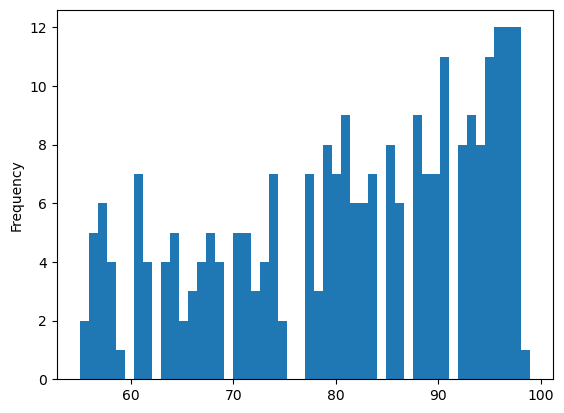

In [ ]:
# Гистограмма оценок
df['user rating score'].sort_values().plot.hist(bins=50, x='user rating score')


In [ ]:
round(df['user rating score'].describe())


count    256.0
mean      81.0
std       13.0
min       55.0
25%       71.0
50%       84.0
75%       93.0
max       99.0
Name: user rating score, dtype: float64

In [ ]:
df_stat1 = df.groupby('words_in_title').describe().unstack().unstack().unstack().unstack()
df_stat1

words_in_title                          
1               count  release year          103.000000
                       user rating score      62.000000
                       title_len             103.000000
                mean   release year         2011.097087
                       user rating score      82.903226
                                               ...     
12              75%    user rating score      84.000000
                       title_len              67.000000
                max    release year         2016.000000
                       user rating score      84.000000
                       title_len              67.000000
Length: 264, dtype: float64

In [ ]:
df_title_alphabet = df.sort_values(by='title')
df_title_alphabet

,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
169,10 Things I Hate About You,PG-13,"adult content, adult language and mild violence",1999,68.0,26,6
228,100 Metros,TV-MA,mature audiences. may be unsuitable for all children,2016,NaN,10,2
41,13 Reasons Why,TV-MA,mature audiences. may be unsuitable for all children,2017,99.0,14,3
32,3%,TV-MA,mature audiences. may be unsuitable for all children,2016,NaN,2,1
85,30 Rock,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2012,66.0,7,2
...,...,...,...,...,...,...,...
478,Yellowbird,PG,parental guidance suggested. may be unsuitable for children,2014,NaN,10,1
282,Young Justice,TV-PG,parental guidance suggested. may be unsuitable for all children,2012,71.0,13,2
462,Zoobabu,TV-Y,suitable for all ages,2010,NaN,7,1
73,Zootopia,PG,"thematic elements, rude humor and action",2016,97.0,8,1


Text(0.5, 1.0, 'title sorted by alphabet')

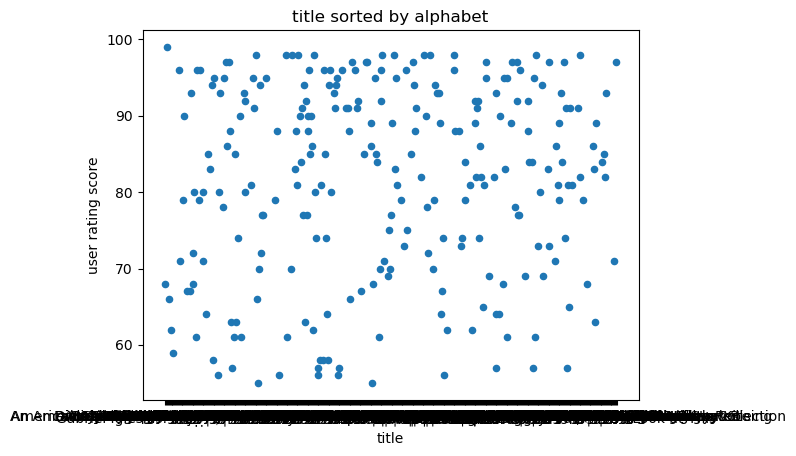

In [ ]:
plt.style.use('default')
df_title_alphabet.plot.scatter(x='title', y='user rating score')
plt.title('title sorted by alphabet')

In [ ]:
df_title_len = df.sort_values(by='title_len')
df_title_len

,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
32,3%,TV-MA,mature audiences. may be unsuitable for all children,2016,NaN,2,1
463,Gon,TV-G,suitable for all ages,2013,NaN,3,1
256,I.T,NR,this movie has not been rated,2016,NaN,3,1
108,Easy,TV-MA,mature audiences. may be unsuitable for all children,2016,NaN,4,1
206,Lost,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2010,98.0,4,1
...,...,...,...,...,...,...,...
476,Disney Animation Collection: Vol. 2: Three Little Pigs,TV-G,suitable for all ages,2009,NaN,54,8
414,Pooh's Grand Adventure: The Search for Christopher Robin,G,general audiences. suitable for all ages,1997,NaN,56,8
357,Disney Animation Collection: Vol. 1: Mickey and the Beanstalk,TV-G,suitable for all ages,2009,NaN,61,9
432,Disney Animation Collection: Vol. 4: The Tortoise and the Hare,TV-G,suitable for all ages,2009,NaN,62,10


Text(0.5, 1.0, 'title sorted by lenght')

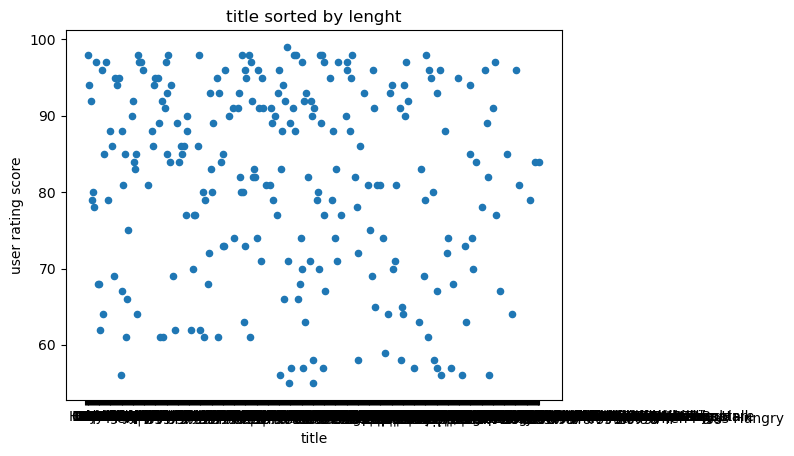

In [ ]:
df_title_len.plot.scatter(x='title', y='user rating score')
plt.title('title sorted by lenght')

In [ ]:
df_title_words = df.sort_values(by='words_in_title')
df_title_words

,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
88,Californication,TV-MA,mature audiences. may be unsuitable for all children,2014,63.0,15,1
124,Brickleberry,TV-MA,mature audiences. may be unsuitable for all children,2014,63.0,12,1
240,Longmire,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2016,92.0,8,1
119,Skins,TV-MA,mature audiences. may be unsuitable for all children,2013,NaN,5,1
248,Gotham,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2016,85.0,6,1
...,...,...,...,...,...,...,...
421,An American Tail: The Mystery of the Night Monster,G,general audiences. suitable for all ages,1999,NaN,50,9
322,LEGO Ninjago: Masters of Spinjitzu: Way of the Ninja,TV-Y7-FV,suitable for children from 7 years old. fantasy violence,2011,NaN,52,9
432,Disney Animation Collection: Vol. 4: The Tortoise and the Hare,TV-G,suitable for all ages,2009,NaN,62,10
315,The Cat in the Hat Knows a Lot About That!,TV-Y,suitable for all ages,2014,NaN,42,10


Text(0.5, 1.0, 'title sorted by words count')

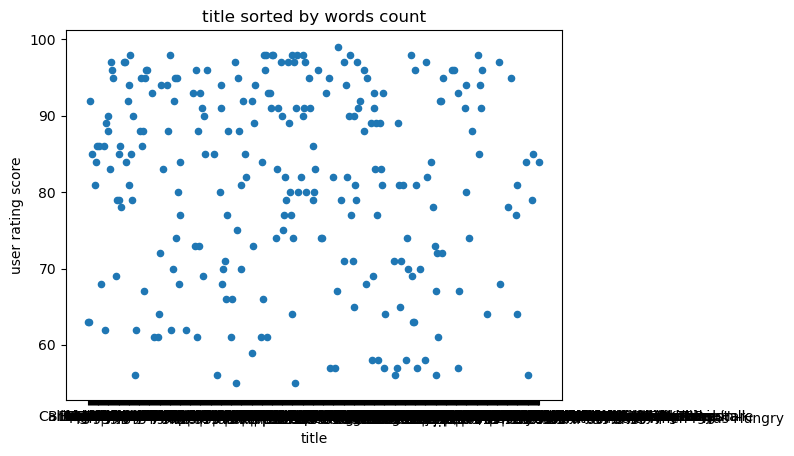

In [ ]:
df_title_words.plot.scatter(x='title', y='user rating score')
plt.title('title sorted by words count')

In [ ]:
# Нечетные/четные оценки
df['score_odd'] = df['user rating score'].apply(lambda x: x%2)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/3686592612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_odd'] = df['user rating score'].apply(lambda x: x%2)


,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title,title_startswith,score_10,score_X,score_odd
0,White Chicks,PG-13,"crude and sexual humor, language and drug content",2004,82.0,12,2,w,8.0,2.0,0.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult language",2006,NaN,19,3,l,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2016,98.0,14,2,g,9.0,8.0,0.0
3,Prison Break,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2008,98.0,12,2,p,9.0,8.0,0.0
4,How I Met Your Mother,TV-PG,parental guidance suggested. may be unsuitable for all children,2014,94.0,21,5,h,9.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,rude humor and sports action,2015,NaN,15,2,r,NaN,NaN,NaN
496,Wiener Dog Internationals,G,general audiences. suitable for all ages,2015,NaN,25,3,w,NaN,NaN,NaN
497,Pup Star,G,general audiences. suitable for all ages,2016,NaN,8,2,p,NaN,NaN,NaN
498,Precious Puppies,TV-G,suitable for all ages,2003,NaN,16,2,p,NaN,NaN,NaN


Text(0.5, 1.0, 'title sorted by release year')

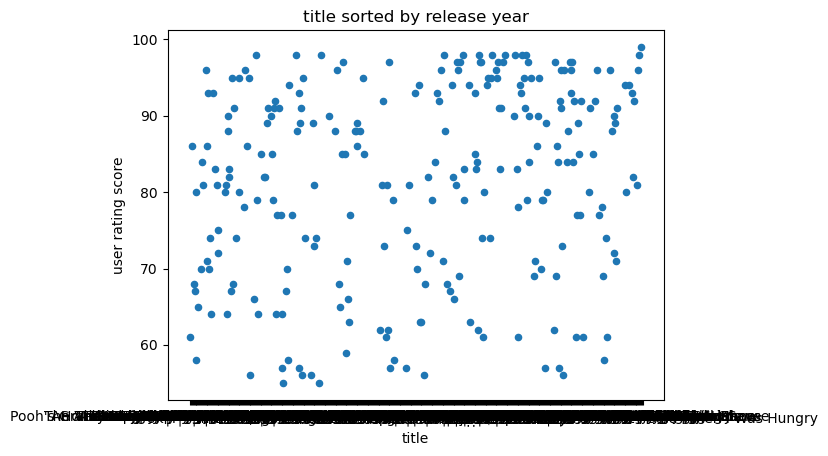

In [ ]:
df.sort_values(by='release year').plot.scatter(x='title', y='user rating score')
plt.title('title sorted by release year')

Text(0.5, 1.0, 'title sorted by score_10')

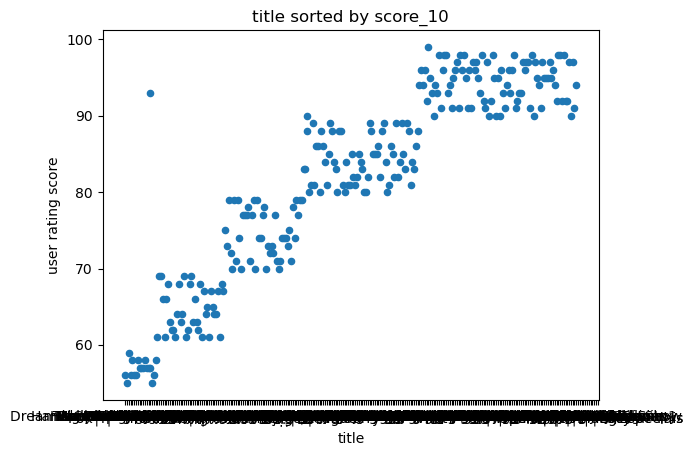

In [ ]:
df.sort_values(by='score_10').plot.scatter(x='title', y='user rating score')
plt.title('title sorted by score_10')

Text(0.5, 1.0, 'title sorted by score_X')

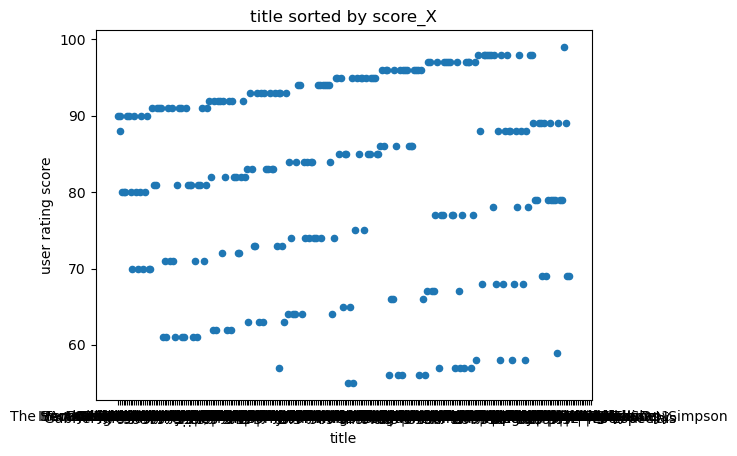

In [ ]:
df.sort_values(by='score_X').plot.scatter(x='title', y='user rating score')
plt.title('title sorted by score_X')

Text(0.5, 1.0, 'title sorted by score_odd')

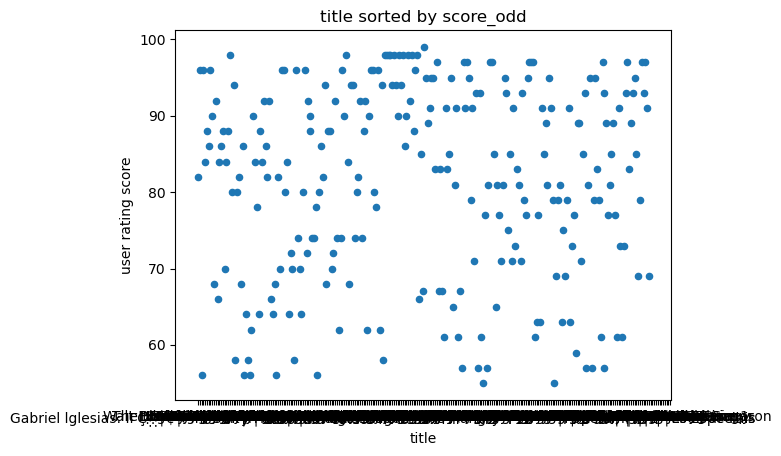

In [ ]:
df.sort_values(by='score_odd').plot.scatter(x='title', y='user rating score')
plt.title('title sorted by score_odd')

Text(0.5, 1.0, 'title sorted by rating')

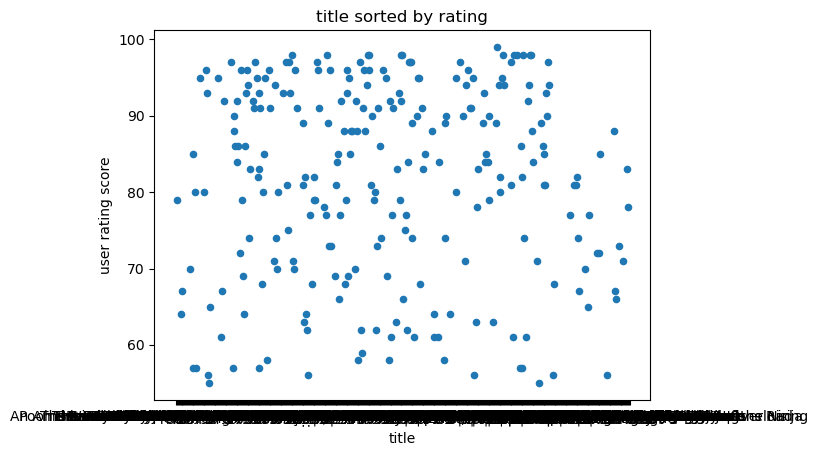

In [ ]:
df.sort_values(by='rating').plot.scatter(x='title', y='user rating score')
plt.title('title sorted by rating')

In [ ]:
df['title_startswith'] = df_title_alphabet.title.apply(lambda x: x[0].lower())
df

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/3242925632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_startswith'] = df_title_alphabet.title.apply(lambda x: x[0].lower())


,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title,title_startswith
0,White Chicks,PG-13,"crude and sexual humor, language and drug content",2004,82.0,12,2,w
1,Lucky Number Slevin,R,"strong violence, sexual content and adult language",2006,NaN,19,3,l
2,Grey's Anatomy,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2016,98.0,14,2,g
3,Prison Break,TV-14,parents strongly cautioned. may be unsuitable for children under 15,2008,98.0,12,2,p
4,How I Met Your Mother,TV-PG,parental guidance suggested. may be unsuitable for all children,2014,94.0,21,5,h
...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,rude humor and sports action,2015,NaN,15,2,r
496,Wiener Dog Internationals,G,general audiences. suitable for all ages,2015,NaN,25,3,w
497,Pup Star,G,general audiences. suitable for all ages,2016,NaN,8,2,p
498,Precious Puppies,TV-G,suitable for all ages,2003,NaN,16,2,p


In [ ]:
def get_stat(df, param_list=['max', 'mean', '50%', 'min']):
    """Получить статистику по describe датафрейму"""
    result = {}
    for param in param_list:
        result[param] = []
        result[param].append(round(df[param].max()))
        result[param].append(round(df[param].mean()))
        result[param].append(round(df[param].median()))
        result[param].append(round(df[param].min()))
    return result



In [ ]:
df_title_startswith = dg_title_startswith.describe()
df_title_startswith

,count,mean,std,min,25%,50%,75%,max
title_startswith,,,,,,,,
1,2.0,83.500000,21.920310,68.0,75.75,83.5,91.25,99.0
3,1.0,66.000000,NaN,66.0,66.00,66.0,66.00,66.0
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,62.000000,NaN,62.0,62.00,62.0,62.00,62.0
a,15.0,78.266667,13.155480,59.0,67.50,79.0,91.50,96.0
b,21.0,79.333333,14.357344,56.0,64.00,83.0,93.00,97.0
c,13.0,79.923077,14.693885,55.0,66.00,81.0,92.00,98.0
d,9.0,78.666667,12.389512,56.0,72.00,77.0,88.00,95.0
e,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_title_startswith= df_title_startswith.reset_index()
df_title_startswith

,title_startswith,count,mean,std,min,25%,50%,75%,max
0,1,2.0,83.500000,21.920310,68.0,75.75,83.5,91.25,99.0
1,3,1.0,66.000000,NaN,66.0,66.00,66.0,66.00,66.0
2,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1.0,62.000000,NaN,62.0,62.00,62.0,62.00,62.0
4,a,15.0,78.266667,13.155480,59.0,67.50,79.0,91.50,96.0
5,b,21.0,79.333333,14.357344,56.0,64.00,83.0,93.00,97.0
6,c,13.0,79.923077,14.693885,55.0,66.00,81.0,92.00,98.0
7,d,9.0,78.666667,12.389512,56.0,72.00,77.0,88.00,95.0
8,e,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f,9.0,85.222222,13.045859,61.0,81.00,88.0,98.00,98.0


<AxesSubplot:xlabel='title_startswith', ylabel='user rating score'>

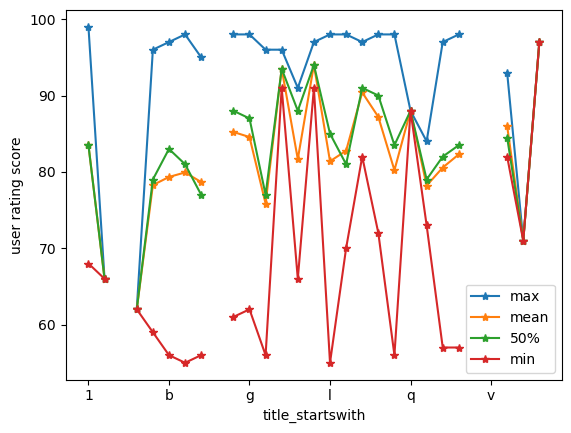

In [ ]:
df_title_startswith[['title_startswith', 'max', 'mean', '50%', 'min']].plot(x='title_startswith',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='title_startswith', ylabel='count'>

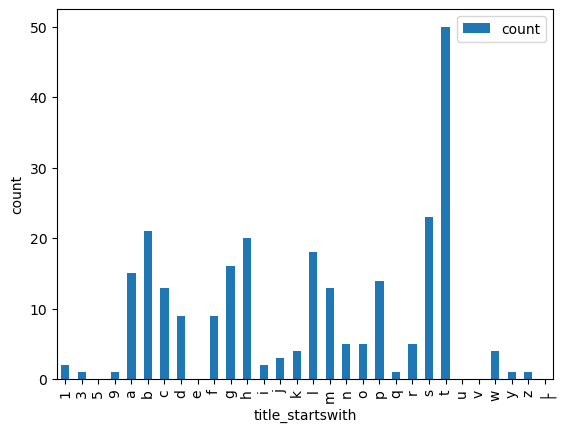

In [ ]:
df_title_startswith[['title_startswith', 'count']].plot(x='title_startswith',ylabel='count',kind='bar')


In [ ]:
pd.DataFrame(get_stat(df_title_startswith),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,97,97,97
mean,92,82,83,68
50%,97,82,84,66
min,62,62,62,55


In [ ]:
df_title_len = df.groupby('title_len')['user rating score'].describe().reset_index()
df_title_len

,title_len,count,mean,std,min,25%,50%,75%,max
0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,7.0,88.285714,8.920282,78.0,79.50,92.0,95.50,98.0
3,5,8.0,77.375000,14.060456,62.0,67.00,73.5,87.75,97.0
4,6,12.0,80.416667,13.687807,56.0,68.50,85.5,89.50,95.0
5,7,12.0,85.583333,11.889325,64.0,81.00,87.5,96.25,98.0
6,8,13.0,85.769231,11.889448,61.0,85.00,89.0,94.00,97.0
7,9,10.0,84.400000,11.127543,62.0,84.00,85.5,92.00,98.0
8,10,16.0,77.062500,10.853379,61.0,69.50,77.0,86.00,98.0
9,11,12.0,83.750000,10.618380,61.0,78.25,84.5,93.00,96.0


<AxesSubplot:xlabel='title_len', ylabel='user rating score'>

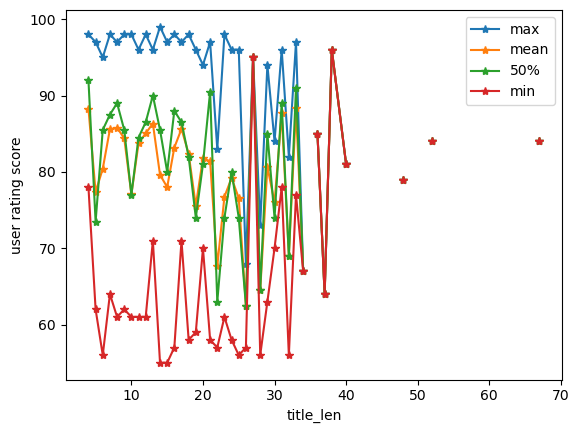

In [ ]:
df_title_len[['title_len', 'max', 'mean', '50%', 'min']].plot(x='title_len',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='title_len'>

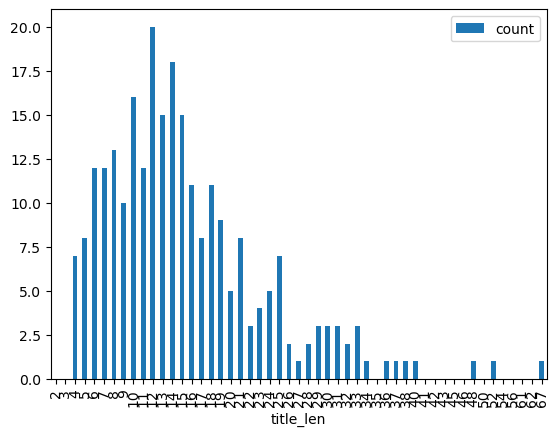

In [ ]:
df_title_len[['title_len', 'count']].plot(x='title_len',kind='bar')


In [ ]:
pd.DataFrame(get_stat(df_title_len),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,96,96,96
mean,91,80,81,67
50%,96,81,84,62
min,64,62,62,55


In [ ]:
df_words_in_title = df.groupby('words_in_title')['user rating score'].describe().reset_index()
df_words_in_title

,words_in_title,count,mean,std,min,25%,50%,75%,max
0,1,62.0,82.903226,12.015986,56.0,75.00,86.0,93.75,98.0
1,2,77.0,81.792208,12.680629,55.0,73.00,84.0,93.00,98.0
2,3,57.0,82.631579,12.309450,57.0,74.00,83.0,93.00,99.0
3,4,32.0,74.312500,13.417460,56.0,63.00,72.0,82.50,98.0
4,5,16.0,85.250000,12.994871,57.0,78.50,91.0,94.50,98.0
5,6,4.0,84.500000,13.916417,68.0,75.50,86.5,95.50,97.0
6,7,4.0,76.500000,8.812869,64.0,73.75,79.0,81.75,84.0
7,8,3.0,73.333333,15.307950,56.0,67.50,79.0,82.00,85.0
8,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='words_in_title', ylabel='user rating score'>

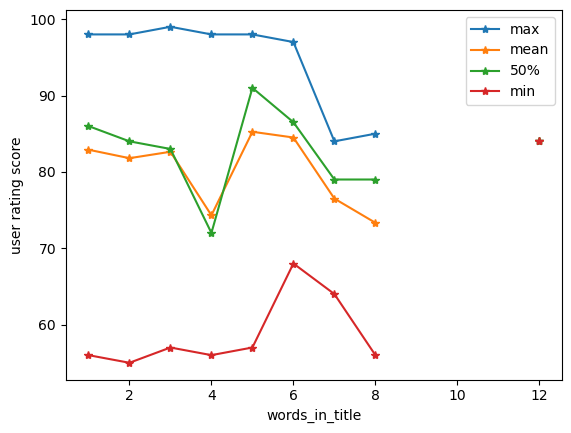

In [ ]:
df_words_in_title[['words_in_title', 'max', 'mean', '50%', 'min']].plot(x='words_in_title',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='words_in_title', ylabel='count'>

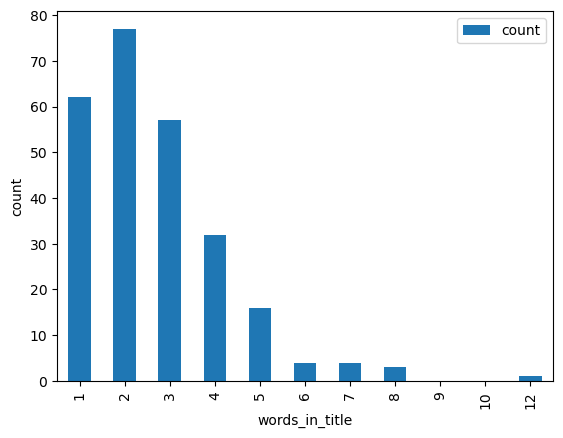

In [ ]:
df_words_in_title[['words_in_title', 'count']].plot(x='words_in_title',ylabel='count',kind='bar')


In [ ]:
pd.DataFrame(get_stat(df_words_in_title),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,85,91,84
mean,93,81,83,61
50%,98,83,84,57
min,84,73,72,55


In [ ]:
df_rating = df.groupby('rating')['user rating score'].describe().reset_index()
df_rating

,rating,count,mean,std,min,25%,50%,75%,max
0,G,19.0,74.421053,14.893383,55.0,62.50,70.0,88.50,96.0
1,NR,2.0,77.000000,28.284271,57.0,67.00,77.0,87.00,97.0
2,PG,48.0,84.104167,11.164609,57.0,74.75,86.0,93.25,98.0
3,PG-13,9.0,71.444444,11.337009,56.0,63.00,68.0,82.00,89.0
4,R,7.0,85.285714,8.994707,77.0,78.50,79.0,93.50,97.0
5,TV-14,77.0,82.870130,12.324933,58.0,73.00,86.0,93.00,98.0
6,TV-G,11.0,74.363636,13.002098,58.0,62.50,74.0,86.50,90.0
7,TV-MA,40.0,84.825000,12.775954,56.0,80.00,89.0,95.00,99.0
8,TV-PG,21.0,83.809524,13.246203,55.0,81.00,88.0,93.00,98.0
9,TV-Y,8.0,75.000000,6.141196,67.0,69.50,75.5,81.00,82.0


<AxesSubplot:xlabel='rating', ylabel='user rating score'>

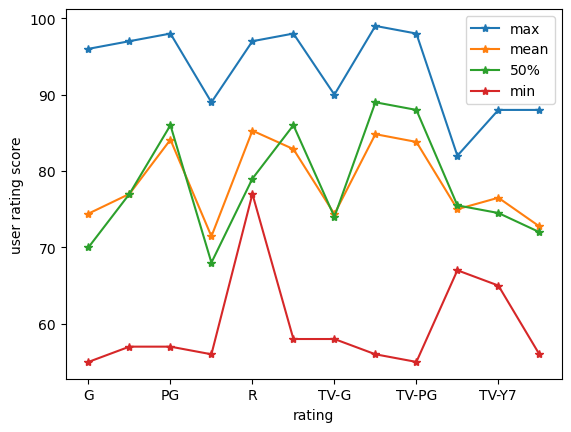

In [ ]:
df_rating[['rating', 'max', 'mean', '50%', 'min']].plot(x='rating',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='rating', ylabel='count'>

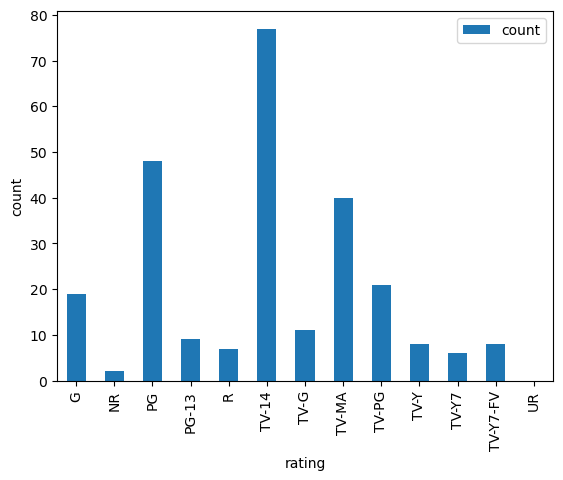

In [ ]:
df_rating[['rating', 'count']].plot(x='rating',ylabel='count',kind='bar')

In [ ]:
pd.DataFrame(get_stat(df_rating),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,85,89,77
mean,93,79,78,60
50%,96,77,76,57
min,82,71,68,55


In [ ]:
df_relise_year = df.groupby('release year')['user rating score'].describe().reset_index()
df_relise_year

,release year,count,mean,std,min,25%,50%,75%,max
0,1940,1.0,61.000000,NaN,61.0,61.00,61.0,61.00,61.0
1,1976,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978,1.0,86.000000,NaN,86.0,86.00,86.0,86.00,86.0
3,1982,1.0,68.000000,NaN,68.0,68.00,68.0,68.00,68.0
4,1986,1.0,67.000000,NaN,67.0,67.00,67.0,67.00,67.0
5,1987,1.0,58.000000,NaN,58.0,58.00,58.0,58.00,58.0
6,1989,1.0,80.000000,NaN,80.0,80.00,80.0,80.00,80.0
7,1990,1.0,65.000000,NaN,65.0,65.00,65.0,65.00,65.0
8,1991,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1992,1.0,70.000000,NaN,70.0,70.00,70.0,70.00,70.0


<AxesSubplot:xlabel='release year', ylabel='user rating score'>

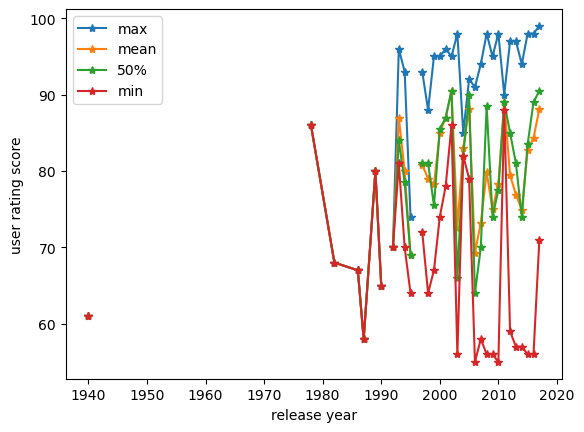

In [ ]:
df_relise_year[['release year', 'max', 'mean', '50%', 'min']].plot(x='release year',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='release year', ylabel='count'>

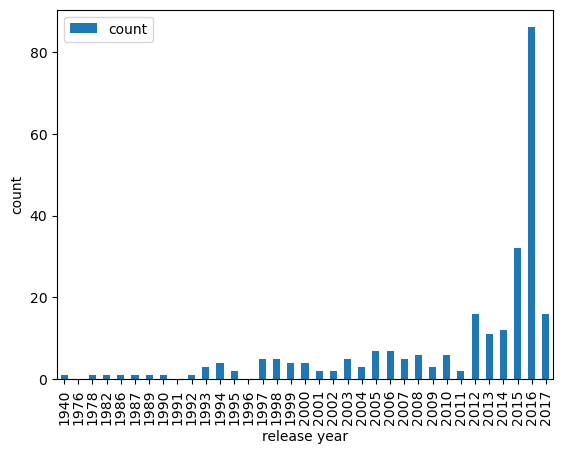

In [ ]:
df_relise_year[['release year', 'count']].plot(x='release year',ylabel='count',kind='bar')


In [ ]:
pd.DataFrame(get_stat(df_relise_year),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,90,90,88
mean,88,78,78,67
50%,94,79,80,66
min,58,58,58,55


In [ ]:
df['score_10'] = df['user rating score'].apply(lambda x: x//10)

df_score_10 = df.groupby('score_10')['user rating score'].describe().reset_index()
df_score_10

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/4135110024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_10'] = df['user rating score'].apply(lambda x: x//10)


,score_10,count,mean,std,min,25%,50%,75%,max
0,5.0,18.0,56.833333,1.098127,55.0,56.0,57.0,57.75,59.0
1,6.0,38.0,64.710526,2.817972,61.0,62.0,64.0,67.00,69.0
2,7.0,44.0,74.681818,3.175288,70.0,72.0,74.0,77.25,79.0
3,8.0,65.0,84.276923,2.981755,80.0,82.0,84.0,86.00,89.0
4,9.0,91.0,94.417582,2.624948,90.0,92.0,95.0,97.00,99.0


<AxesSubplot:xlabel='score_10', ylabel='user rating score'>

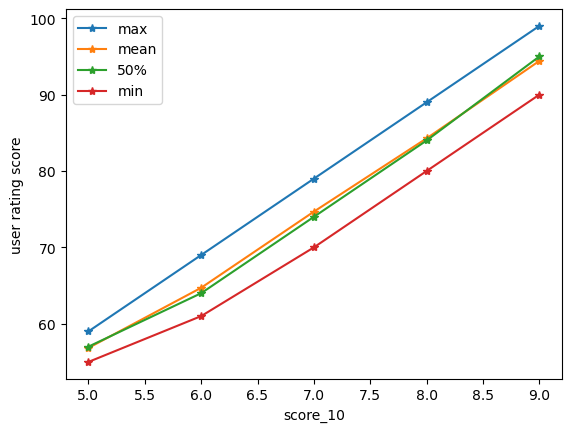

In [ ]:
df_score_10[['score_10', 'max', 'mean', '50%', 'min']].plot(x='score_10',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='score_10', ylabel='count'>

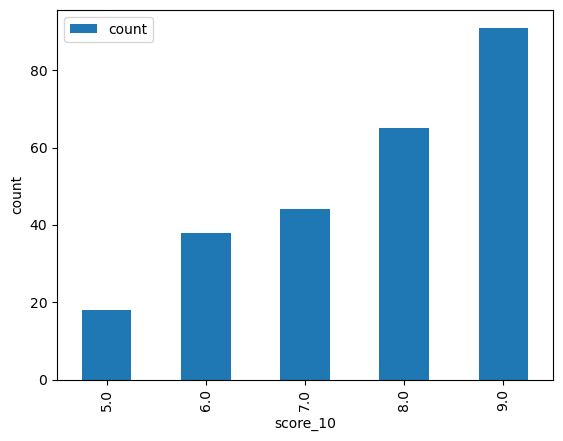

In [ ]:
df_score_10[['score_10', 'count']].plot(x='score_10',ylabel='count',kind='bar')

In [ ]:
pd.DataFrame(get_stat(df_score_10),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,94,95,90
mean,79,75,75,71
50%,79,75,74,70
min,59,57,57,55


In [ ]:
# Оценки,оканчивающиеся на
df['score_X'] = df['user rating score'].apply(lambda x: x%10)
df_score_X = df.groupby('score_X')['user rating score'].describe().reset_index()
df_score_X

C:\Users\USER\AppData\Local\Temp/ipykernel_18832/1753773563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_X'] = df['user rating score'].apply(lambda x: x%10)


,score_X,count,mean,std,min,25%,50%,75%,max
0,0.0,19.0,81.052632,8.093026,70.0,75.0,80.0,90.0,90.0
1,1.0,32.0,78.500000,11.639754,61.0,71.0,81.0,91.0,91.0
2,2.0,21.0,80.571429,11.526367,62.0,72.0,82.0,92.0,92.0
3,3.0,23.0,81.695652,11.403487,63.0,73.0,83.0,93.0,93.0
4,4.0,27.0,80.666667,11.094004,64.0,74.0,84.0,94.0,94.0
5,5.0,25.0,84.600000,12.741010,55.0,85.0,85.0,95.0,95.0
6,6.0,26.0,82.538462,16.233868,56.0,66.0,86.0,96.0,96.0
7,7.0,29.0,79.758621,16.234124,57.0,67.0,77.0,97.0,97.0
8,8.0,33.0,84.060606,14.348213,58.0,68.0,88.0,98.0,98.0
9,9.0,21.0,80.428571,9.636241,59.0,79.0,79.0,89.0,99.0


<AxesSubplot:xlabel='score_X', ylabel='user rating score'>

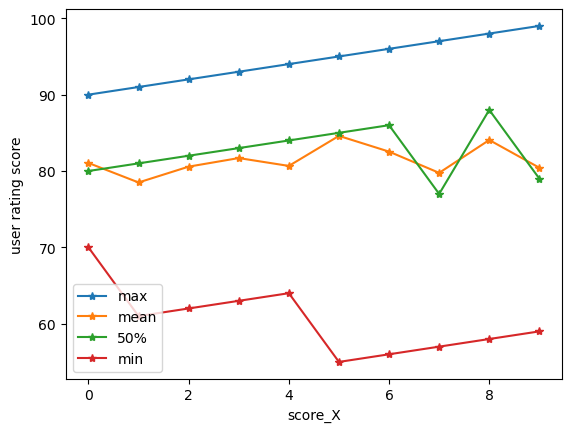

In [ ]:
df_score_X[['score_X', 'max', 'mean', '50%', 'min']].plot(x='score_X',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='score_X', ylabel='count'>

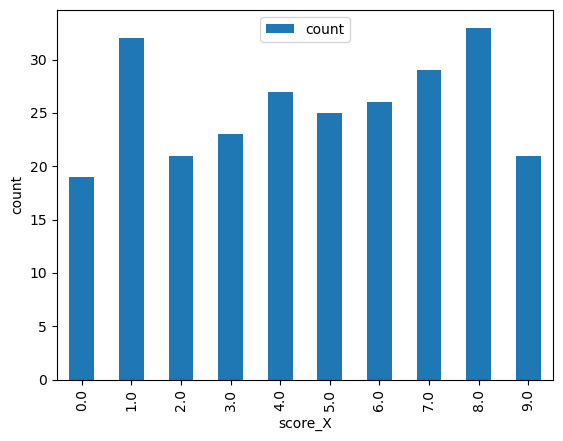

In [ ]:
# Количество оценок
df_score_X[['score_X', 'count']].plot(x='score_X',ylabel='count', kind='bar')

In [ ]:
pd.DataFrame(get_stat(df_score_X),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,85,88,70
mean,94,81,82,60
50%,94,81,82,60
min,90,78,77,55


In [ ]:
# Оценки,оканчивающиеся на 0|1
df_score_odd = df.groupby('score_odd')['user rating score'].describe().reset_index()
df_score_odd

,score_odd,count,mean,std,min,25%,50%,75%,max
0,0.0,126.0,81.984127,12.79624,56.0,72.0,84.0,93.5,98.0
1,1.0,130.0,80.830769,12.69080,55.0,71.0,82.0,92.5,99.0


<AxesSubplot:xlabel='score_odd', ylabel='user rating score'>

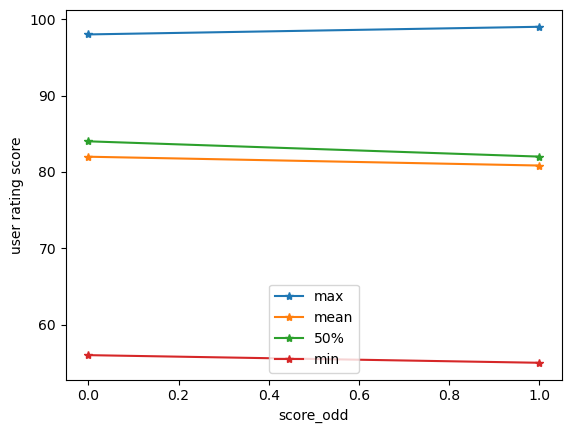

In [ ]:
df_score_odd[['score_odd', 'max', 'mean', '50%', 'min']].plot(x='score_odd',ylabel='user rating score',marker = "*")


<AxesSubplot:xlabel='score_odd', ylabel='count'>

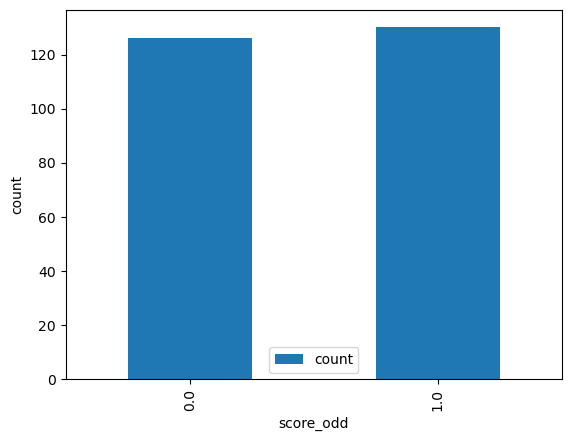

In [ ]:
# Количество оценок
df_score_odd[['score_odd', 'count']].plot(x='score_odd',ylabel='count', kind='bar')

In [ ]:
pd.DataFrame(get_stat(df_score_odd),index=['max', 'mean', '50%', 'min'])

,max,mean,50%,min
max,99,82,84,56
mean,98,81,83,56
50%,98,81,83,56
min,98,81,82,55


In [ ]:
df.score_X.nunique()

10

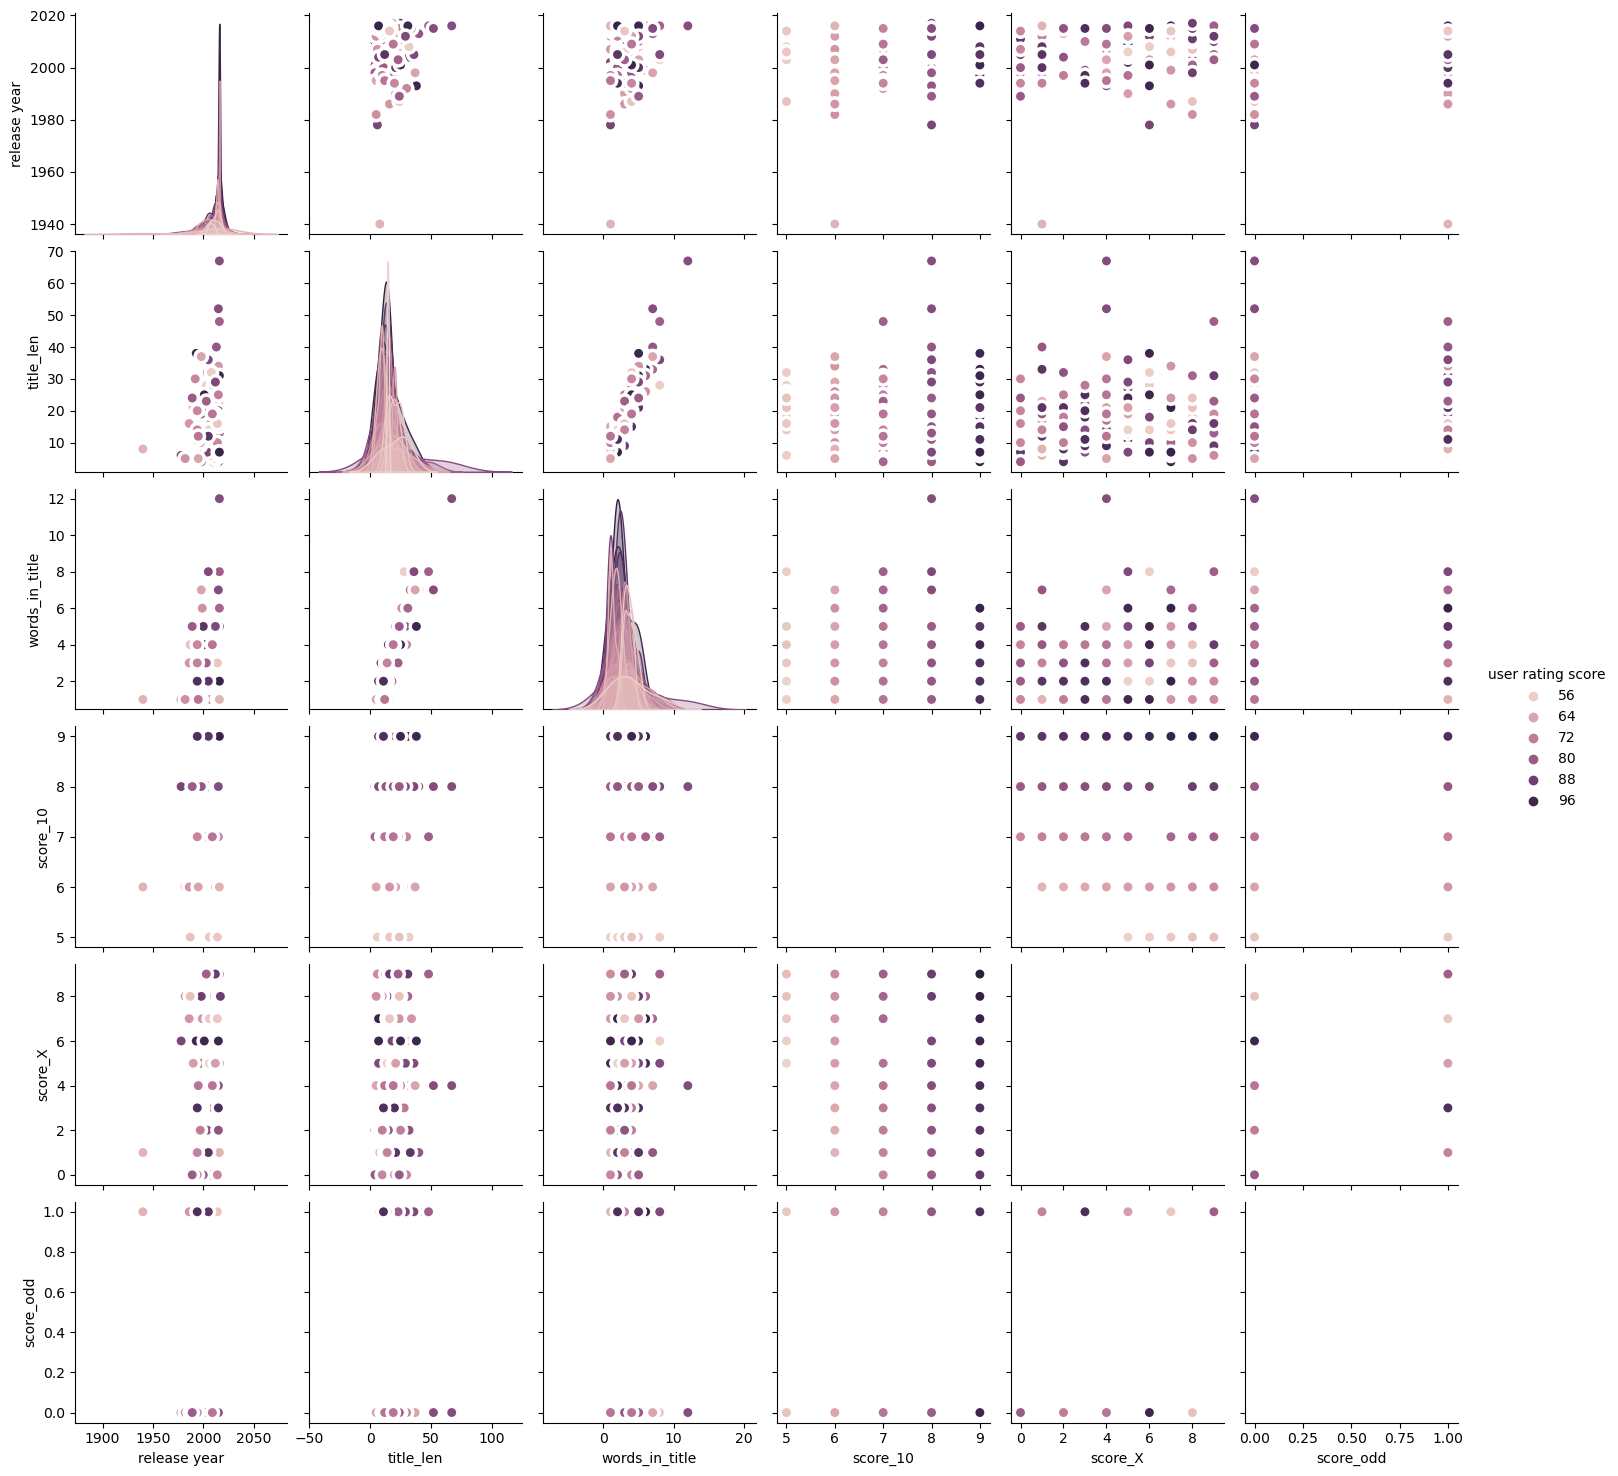

In [ ]:
sns.pairplot(df, kind="scatter", hue="user rating score", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [ ]:
# Мода - значение во множестве наблюдений, которое встречается наиболее часто
df['user rating score'].mode()

0    96.0
1    97.0
2    98.0
dtype: float64

***Вывод:*** чаще всего ставят высокие оценки

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
# статистика оценок за все время
df['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [ ]:
df.groupby('rating')['user rating score'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
G,19.0,74.421053,14.893383,55.0,62.50,70.0,88.50,96.0
NR,2.0,77.000000,28.284271,57.0,67.00,77.0,87.00,97.0
PG,48.0,84.104167,11.164609,57.0,74.75,86.0,93.25,98.0
PG-13,9.0,71.444444,11.337009,56.0,63.00,68.0,82.00,89.0
R,7.0,85.285714,8.994707,77.0,78.50,79.0,93.50,97.0
TV-14,77.0,82.870130,12.324933,58.0,73.00,86.0,93.00,98.0
TV-G,11.0,74.363636,13.002098,58.0,62.50,74.0,86.50,90.0
TV-MA,40.0,84.825000,12.775954,56.0,80.00,89.0,95.00,99.0
TV-PG,21.0,83.809524,13.246203,55.0,81.00,88.0,93.00,98.0


***Ответ:*** медиана и среднее отличаются незначительно. Они могут отличаться значительно, например, если в ряду нечетное количество значений, причем половина имеет одно значение, а другая половина - второе значение, значительно отличающиеся друг от друга. В таком случае, медиана будет одно из значений, а среднее - примерно посередине этих значений.



В какие годы были запущены шоу, представленные в датасете?

In [ ]:
print(df['release year'].min(), "-", df['release year'].max())

1940 - 2017


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [ ]:
df.groupby('release year').title.count()

release year
1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: title, dtype: int64

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   1.,   0.,   2.,   2.,   1.,   1.,   5.,   4.,
          2.,   1.,   9.,   9.,   5.,   7.,   6.,   5.,  11.,   7.,  10.,
         10.,   8.,  11.,  10.,  13.,  15.,  27.,  33.,  35.,  61., 183.]),
 array([1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
        1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
        1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
        1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
        1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
        1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
        1994., 1995., 1996., 1997., 1998., 1999., 2000

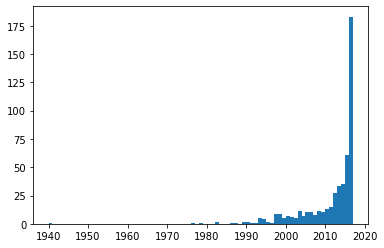

In [ ]:
plt.hist(df['release year'].dropna(),bins=77)

Теперь посмотрим на выброс.

In [ ]:
df[df['release year'] == 1940]

,title,rating,ratingLevel,release year,user rating score
412,Fantasia,G,general audiences. suitable for all ages,1940,61.0


Обнаружение выбросов с помощью интерквартильного размаха.
Выбросы — это те значения данных, которые находятся за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR.

In [ ]:
Q1 = df['release year'].describe()['25%']
Q3 = df['release year'].describe()['75%']
iqr = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("iqr :", iqr)
print("Q1 - 1.5 * iqr = ", Q1 - 1.5 * iqr)
print("Q3 - 1.5 * iqr = ", Q3 + 1.5 * iqr)

Q1: 2009.0
Q3: 2016.0
iqr : 7.0
Q1 - 1.5 * iqr =  1998.5
Q3 - 1.5 * iqr =  2026.5


In [ ]:
print('Количество выбросов, определенных по методу интерквартильного размаха: ', len(df[df['release year'] < round(Q1 - 1.5 * iqr)]))
df[df['release year'] < round(Q1 - 1.5 * iqr)]

Количество выбросов, определенных по методу интерквартильного размаха:  34


,title,rating,ratingLevel,release year,user rating score
170,Grease,PG,parental guidance suggested. may be unsuitable...,1978,86.0
265,The Nightmare Before Christmas,PG,scary images,1993,84.0
270,The Smurfs and the Magic Flute,G,general audiences. suitable for all ages,1976,NaN
271,We're Back! A Dinosaur's Story,G,general audiences. suitable for all ages,1993,NaN
283,The Super Mario Bros. Super Show!,TV-Y7,suitable for children from 7 years old,1989,NaN
284,Power Rangers Zeo,TV-Y7-FV,suitable for children from 7 years old. fantas...,1996,NaN
318,Ninja Turtles: The Next Mutation,TV-Y7-FV,suitable for children from 7 years old. fantas...,1997,NaN
344,The Little Rascals,PG,rude dialogue,1994,86.0
345,Flubber,PG,slapstick action and mild language,1997,83.0
379,Annie,PG,adult content and mild violence,1982,68.0


***Вывод:*** оценки шоу, выпущенные в период выбросов, ставят и сейчас. Поэтому исключать по дате создания не будем.


Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
df1 = df[['release year','user rating score']].dropna()
df1.groupby('release year').mean()

,user rating score
release year,
1940,61.000000
1978,86.000000
1982,68.000000
1986,67.000000
1987,58.000000
1989,80.000000
1990,65.000000
1992,70.000000
1993,87.000000


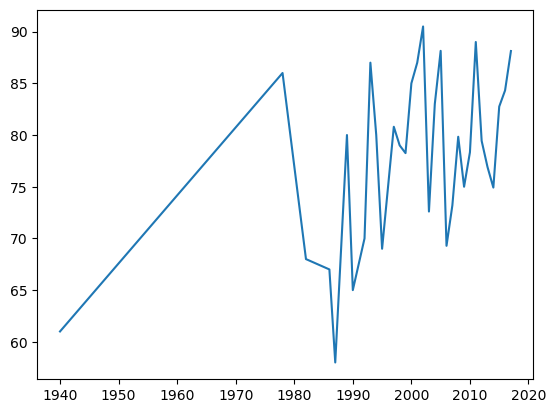

In [ ]:
plt.plot(df1['release year'].sort_values().unique(), df1.groupby('release year').mean().sort_index()['user rating score'])


***Вывод:*** средние оценки (2016 - 84.313953 и 2017 - 88.125000). По состоянию на середину 2017 года, когда предоставлены данные, 2017 год успешнее, чем 2016. Но тк 2017 год еще не закончился, то пользователи могут ставить как высокие так и низкие оценки и по окончанию года средняя оценка может как увеличиться, так и уменьшиться, или остаться такой же.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
df.groupby('rating').rating.count()

rating
G            53
NR           10
PG           76
PG-13        12
R            14
TV-14       106
TV-G         29
TV-MA        82
TV-PG        33
TV-Y         36
TV-Y7        23
TV-Y7-FV     25
UR            1
Name: rating, dtype: int64

***Вывод:*** ...

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
# выберем сериал lie to me
lie_to_me = df[df.title == 'Lie to Me']
lie_to_me

,title,rating,ratingLevel,release year,user rating score,title_len,words_in_title
209,Lie to Me,TV-14,parents strongly cautioned. may be unsuitable ...,2010,89.0,9,3


In [ ]:
# title  -> user rating score
df_title_score = df[['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_title_score.describe(),2))
df_title_score

       user rating score
count             256.00
mean               81.40
std                12.73
min                55.00
25%                71.00
50%                83.50
75%                93.00
max                99.00


,title,user rating score
153,Life Unexpected,55.0
399,Curious George,55.0
382,DreamWorks Shrek's Swamp Stories,56.0
171,How to Lose a Guy in 10 Days,56.0
339,Pok├î┬⌐mon: XY,56.0
...,...,...
27,The Flash,98.0
25,Marvel's Iron Fist,98.0
206,Lost,98.0
75,Finding Dory,98.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

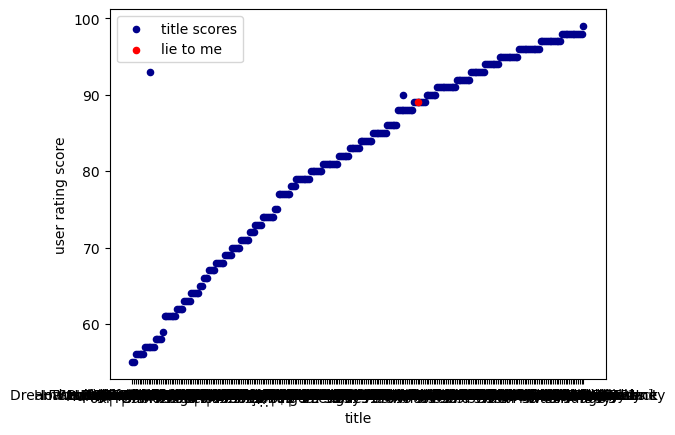

In [ ]:
# Рисуем оценки по возрастанию для df_title_score
ax = df_title_score.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)


In [ ]:
# Посмотрим, какое место сериал занимает в своем rating

df_rating_score = df[df.rating == 'TV-14'][['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_rating_score.describe(),2))
df_rating_score


       user rating score
count              77.00
mean               82.87
std                12.32
min                58.00
25%                73.00
50%                86.00
75%                93.00
max                98.00


,title,user rating score
133,Haters Back Off,58.0
154,Being Human (U.S.),58.0
121,Absolutely Fabulous,59.0
139,Little Boxes,61.0
197,Army Wives,61.0
...,...,...
3,Prison Break,98.0
206,Lost,98.0
56,Criminal Minds,98.0
57,Friends,98.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

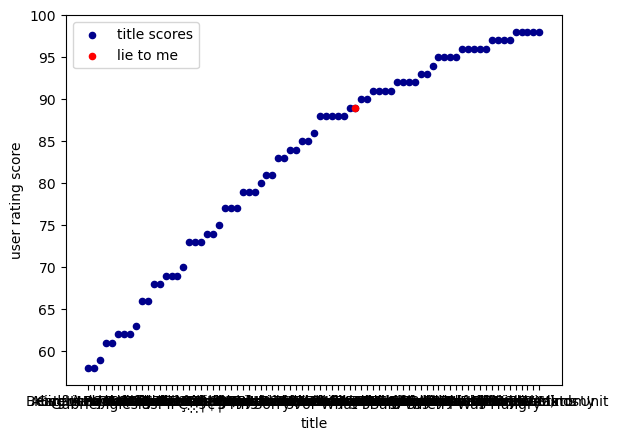

In [ ]:
# Рисуем оценки по возрастанию для df_rating_score
ax = df_rating_score.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)


In [ ]:
# Посмотрим, какое место сериал занимает в своем release year

df_year_score = df[df['release year'] == 2010][['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_year_score.describe(),2))
df_year_score


       user rating score
count               6.00
mean               78.33
std                14.83
min                55.00
25%                73.25
50%                77.50
75%                87.00
max                98.00


,title,user rating score
153,Life Unexpected,55.0
281,Mighty Morphin Power Rangers,73.0
274,Cars Toons: Mater's Tall Tales,74.0
178,Friday Night Lights,81.0
209,Lie to Me,89.0
206,Lost,98.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

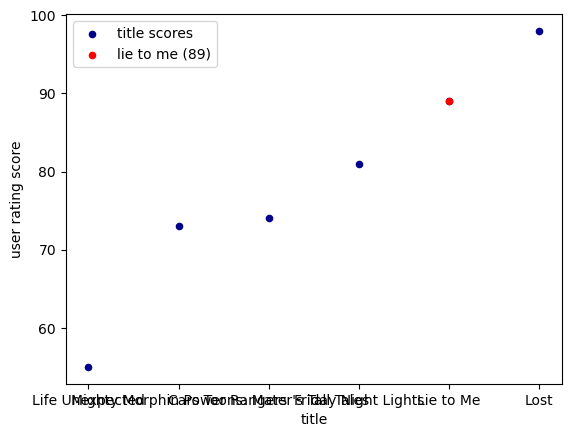

In [ ]:
# Рисуем оценки по возрастанию для df_year_score
ax = df_year_score.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)

In [ ]:
# Посмотрим, какое место сериал занимает среди заголовков с длиной 9

df_title_len_score = df[df['title_len'] == 9][['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_title_len_score.describe(),2))
df_title_len_score

       user rating score
count              10.00
mean               84.40
std                11.13
min                62.00
25%                84.00
50%                85.50
75%                92.00
max                98.00


,title,user rating score
143,Greenleaf,62.0
204,Skin Wars,69.0
223,The Crown,84.0
253,Limitless,84.0
182,Heartland,85.0
254,Travelers,86.0
209,Lie to Me,89.0
397,Anastasia,93.0
353,Bee Movie,94.0
27,The Flash,98.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

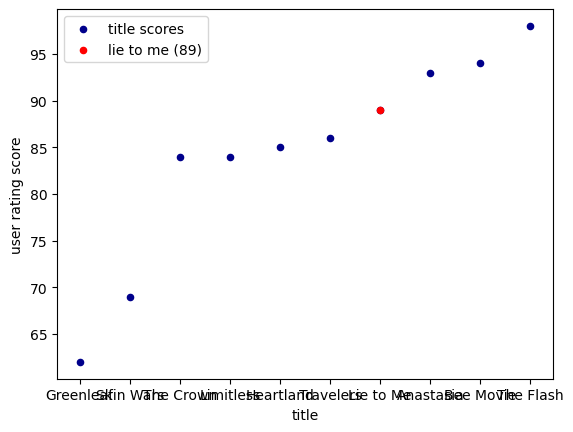

In [ ]:
# Рисуем оценки по возрастанию для df_year_score
ax = df_title_len_score.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)

In [ ]:
# Посмотрим, какое место сериал занимает среди заголовков из 3 слов

df_words_in_title_score = df[df['words_in_title'] == 3][['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_words_in_title_score.describe(),2))
df_words_in_title_score

       user rating score
count              57.00
mean               82.63
std                12.31
min                57.00
25%                74.00
50%                83.00
75%                93.00
max                99.00


,title,user rating score
435,The Pirate Fairy,57.0
424,Brother Bear 2,57.0
251,Hap and Leonard,57.0
154,Being Human (U.S.),58.0
133,Haters Back Off,58.0
193,High School Musical,64.0
405,The Real Ghostbusters,65.0
413,An American Tail,67.0
106,Life in Pieces,68.0
131,The Carmichael Show,69.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

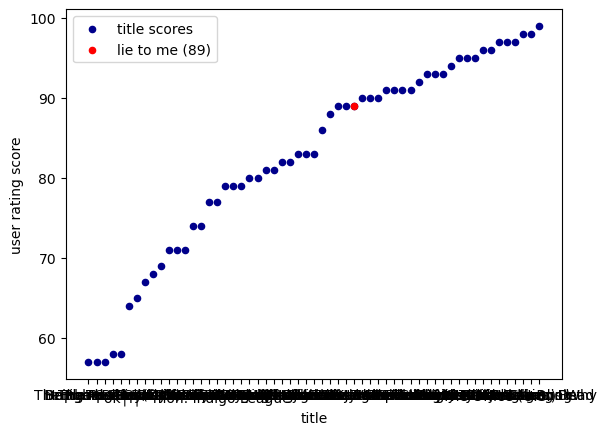

In [ ]:
# Рисуем оценки по возрастанию для df_words_in_title_score
ax = df_words_in_title_score.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)

In [ ]:

df_title_startswith_l = df[df['title_startswith'] == 'l'][['title','user rating score']].sort_values(by='user rating score').dropna()
print(round(df_title_startswith_l.describe(),2))
df_title_startswith_l

       user rating score
count              18.00
mean               81.39
std                13.88
min                55.00
25%                69.25
50%                85.00
75%                94.25
max                98.00


,title,user rating score
153,Life Unexpected,55.0
139,Little Boxes,61.0
320,LEGO Ninjago: Masters of Spinjitzu,67.0
106,Life in Pieces,68.0
232,Luther,69.0
363,Little Einsteins,70.0
115,Louis C.K. 2017,71.0
253,Limitless,84.0
358,Lab Rats,85.0
381,Lilo & Stitch 2: Stitch Has A Glitch,85.0


<AxesSubplot:xlabel='title', ylabel='user rating score'>

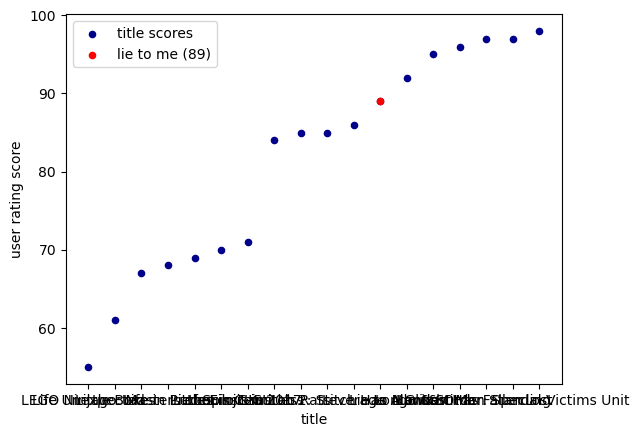

In [ ]:
# Рисуем оценки по возрастанию для df_words_in_title_score
ax = df_title_startswith_l.plot.scatter(x="title", y="user rating score", color="DarkBlue", label="title scores")
lie_to_me.plot.scatter(x="title", y="user rating score", color="Red", label="lie to me (89)", ax=ax)

In [ ]:
pd.options.display.max_colwidth = 100
lie_to_me.T

,209
title,Lie to Me
rating,TV-14
ratingLevel,parents strongly cautioned. may be unsuitable for children under 15
release year,2010
user rating score,89.0
title_len,9
words_in_title,3


***Вывод:*** Lie to Me - шоу с рейтингом выше среднего. В большинстве выборок оценка располагается в 3 квартиле оценок. 
